# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
# Data manipulation
import pandas as pd
import numpy as np
from tqdm.autonotebook import tqdm

from IPython import get_ipython
ipython = get_ipython()

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
#import plotly.plotly as py
#import plotly.graph_objs as go
#from plotly.offline import iplot, init_notebook_mode
#init_notebook_mode(connected=True)

#import cufflinks as cf
#cf.go_offline(connected=True)
#cf.set_config_file(theme='white')


# Analysis/Modeling
Do work here

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here

In [2]:
!head input.txt

777,778 -> 777,676
500,510 -> 378,510
441,657 -> 441,638
724,480 -> 724,778
702,85 -> 44,85
973,961 -> 28,16
913,125 -> 483,125
714,895 -> 870,739
273,774 -> 273,795
623,450 -> 623,616


In [3]:
with open('input.txt','r') as fh:
    lines = fh.readlines()

In [5]:
data = []
for line in lines:
    coords = [int(x) for x in ','.join(line.split(' -> ')).split(',')]
    data.append(coords)
data = np.array(data)

In [6]:
data.shape

(500, 4)

In [7]:
data[:5]

array([[777, 778, 777, 676],
       [500, 510, 378, 510],
       [441, 657, 441, 638],
       [724, 480, 724, 778],
       [702,  85,  44,  85]])

In [8]:
data.max()

990

In [26]:
hits = np.zeros((1000,1000))
for (x1,y1,x2,y2) in data:
    # First time through, didn't think to do this check so missed lines going the "wrong" direction
    if x2 < x1:
        (x1,x2) = (x2,x1)
    if y2 < y1:
        (y1,y2) = (y2,y1)
    if x1==x2:
        hits[x1,y1:y2+1] = hits[x1,y1:y2+1]+1
    elif y1==y2:
        hits[x1:x2+1,y1] = hits[x1:x2+1,y1] +1

In [27]:
hits.max()

4.0

In [28]:
(hits>=2).sum()

6283

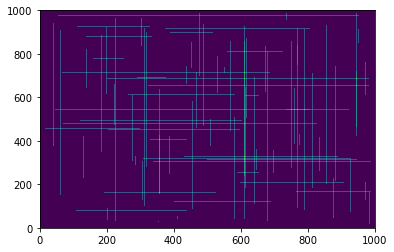

In [25]:
plt.pcolormesh(hits)

In [41]:
def connection(a,b):
    if a>b:
        return np.arange(a,b-1,-1)
    else:
        return np.arange(a,b+1)

In [42]:
hits = np.zeros((1000,1000))
for (x1,y1,x2,y2) in data:
    if x1==x2:
        # Second time around, realized that forcing both x2>x1 and y2>y1 made all the diagonal lines +45 deg
        if y2 < y1:
            (y1,y2) = (y2,y1)
        hits[x1,y1:y2+1] = hits[x1,y1:y2+1]+1
    elif y1==y2:
        if x2 < x1:
            (x1,x2) = (x2,x1)
        hits[x1:x2+1,y1] = hits[x1:x2+1,y1] +1
    else:
        assert(np.abs(x2-x1)==np.abs(y2-y1))
        hits[connection(x1,x2),connection(y1,y2)] = hits[connection(x1,x2),connection(y1,y2)] + 1

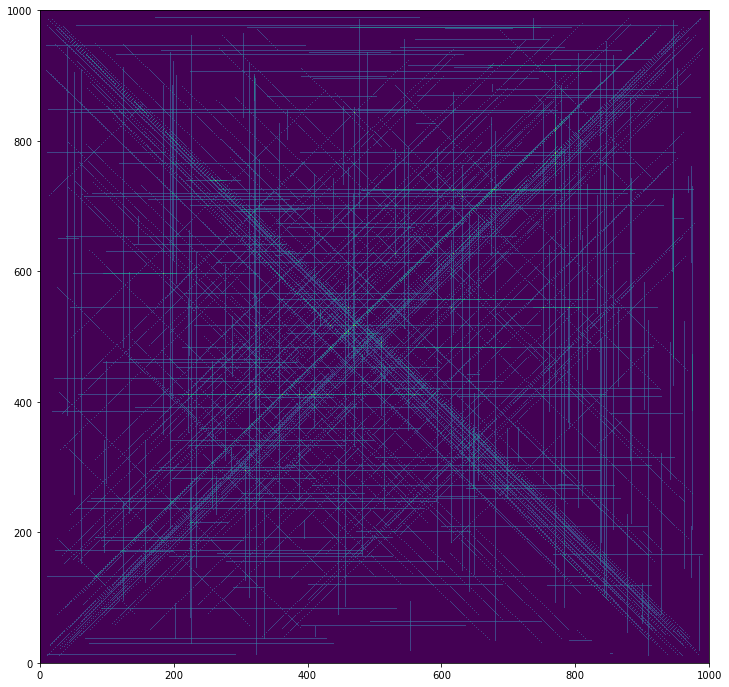

In [47]:
plt.figure(figsize=(12,12))
plt.pcolormesh(hits)

In [45]:
(hits>=2).sum()

18864